In [1]:
%matplotlib inline
#from bokeh.io import output_notebook
#rom bokeh.plotting import *
from matmodlab2 import *
from numpy import *
#output_notebook()
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import dill
import sys

Setting up the Matmodlab notebook environment


In [2]:
def align_pi_plane_with_axes_rot():
    """
    Returns a matrix that rotates the pi plane's normal to be the z axis
    i.e., a slice of pi plane becomes the xy plane after rotation
    """
    pi_vector = np.array([1, 1, 1]) / np.sqrt(3.)
    # wanted_vector = np.array([1, 0, 0])
    wanted_vector = np.array([0, 0, 1])
    wanted_vector = wanted_vector / np.linalg.norm(wanted_vector)
    added = (pi_vector + wanted_vector).reshape([-1, 1])
    # from Rodrigues' rotation formula, more info here: https://math.stackexchange.com/a/2672702
    rot_mat = 2 * (added @ added.T) / (added.T @ added) - np.eye(3)
    return rot_mat


def align_axes_with_pi_plane_rot():
    """
    Returns a matrix that undoes the align_pi_plane_with_axes_rot rotation
    """
    return np.linalg.inv(align_pi_plane_with_axes_rot())

align_axes_with_pi_plane_rot = align_axes_with_pi_plane_rot()
align_pi_plane_with_axes_rot = align_pi_plane_with_axes_rot()


full_sdv_column_names =  [
            # ADDED
            "TIME",
            "DTIME",
            "REAL_SXX",
            "REAL_SYY",
            "REAL_SZZ",
            "REAL_SXY",
            "REAL_SYZ",
            "REAL_SXZ",
            # BEGIN ACTUAL MAT SDVS
            "FICT_EP_XX",  # 0
            "FICT_EP_YY",  # 1
            "FICT_EP_ZZ",  # 2
            "FICT_EP_XY",  # 3
            "FICT_EP_YZ",  # 4
            "FICT_EP_XZ",  # 5
            "FICT_EQPS",   # 6
            "REAL_EP_XX",  # 7
            "REAL_EP_YY",  # 8
            "REAL_EP_ZZ",  # 9
            "REAL_EP_XY",  # 10
            "REAL_EP_YZ",  # 11
            "REAL_EP_XZ",  # 12
            "REAL_EQPS",   # 13
            "Y",           # 14
            "S.VM",        # 15
            # SDVS ABOVE HERE ARE HARD CODED, do not modify SDVs above this line
            "FICT_SXX",    
            "FICT_SYY",
            "FICT_SZZ",
            "FICT_SXY",
            "FICT_SYZ",
            "FICT_SXZ", 
            "TRIAL_STRESS_POST_TRANS_XX",
            "TRIAL_STRESS_POST_TRANS_YY",
            "TRIAL_STRESS_POST_TRANS_ZZ",
            "TRIAL_STRESS_POST_TRANS_XY",
            "TRIAL_STRESS_POST_TRANS_YZ",
            "TRIAL_STRESS_POST_TRANS_XZ",
            "MML_STRESS_GUESS_XX",    
            "MML_STRESS_GUESS_YY", 
            "MML_STRESS_GUESS_ZZ", 
            "MML_STRESS_GUESS_XY",    
            "MML_STRESS_GUESS_YZ", 
            "MML_STRESS_GUESS_XZ", 
            "TRIAL_STRESS_PRE_TRANS_XX",   
            "TRIAL_STRESS_PRE_TRANS_YY",   
            "TRIAL_STRESS_PRE_TRANS_ZZ",   
            "TRIAL_STRESS_PRE_TRANS_XY",   
            "TRIAL_STRESS_PRE_TRANS_YZ",   
            "TRIAL_STRESS_PRE_TRANS_XZ",   
            "CONV_STRESS_ISO_XX", 
            "CONV_STRESS_ISO_YY", 
            "CONV_STRESS_ISO_ZZ", 
            "CONV_STRESS_ISO_XY", 
            "CONV_STRESS_ISO_YZ", 
            "CONV_STRESS_ISO_XZ", 
            "FICT_EQPS_INPUT", 
            "DELTA_EXX", 
            "DELTA_EYY", 
            "DELTA_EZZ", 
            "DELTA_EXY", 
            "DELTA_EYZ", 
            "DELTA_EXZ", 
            'DELTA_SXX',
            'DELTA_SYY',
            'DELTA_SZZ',
            'DELTA_SXY',
            'DELTA_SYZ',
            'DELTA_SXZ',
        ]
column_reorder = [ 'TIME', 'DTIME',
                    'MML_STRESS_GUESS_XX',
                    'MML_STRESS_GUESS_YY',
                    'MML_STRESS_GUESS_ZZ',
                    "MML_STRESS_GUESS_XY",    
                    "MML_STRESS_GUESS_YZ", 
                    "MML_STRESS_GUESS_XZ", 
                    'DELTA_EXX',
                    'DELTA_EYY',
                    'DELTA_EZZ',
                    "DELTA_EXY", 
                    "DELTA_EYZ", 
                    "DELTA_EXZ", 
                    'TRIAL_STRESS_PRE_TRANS_XX',
                    'TRIAL_STRESS_PRE_TRANS_YY',
                    'TRIAL_STRESS_PRE_TRANS_ZZ',
                    "TRIAL_STRESS_PRE_TRANS_XY",   
                    "TRIAL_STRESS_PRE_TRANS_YZ",   
                    "TRIAL_STRESS_PRE_TRANS_XZ",   
                    'DELTA_SXX',
                    'DELTA_SYY',
                    'DELTA_SZZ',
                    'DELTA_SXY',
                    'DELTA_SYZ',
                    'DELTA_SXZ',
                    'TRIAL_STRESS_POST_TRANS_XX',
                    'TRIAL_STRESS_POST_TRANS_YY',
                    'TRIAL_STRESS_POST_TRANS_ZZ',
                    "TRIAL_STRESS_PRE_TRANS_XY",   
                    "TRIAL_STRESS_PRE_TRANS_YZ",   
                    "TRIAL_STRESS_PRE_TRANS_XZ",   
                    'CONV_STRESS_ISO_XX',
                    'CONV_STRESS_ISO_YY',
                    'CONV_STRESS_ISO_ZZ',
                    "CONV_STRESS_ISO_XY", 
                    "CONV_STRESS_ISO_YZ", 
                    "CONV_STRESS_ISO_XZ", 
                    'FICT_SXX',
                    'FICT_SYY',
                    'FICT_SZZ',
                    "FICT_SXY",
                    "FICT_SYZ",
                    "FICT_SXZ", 
                    "FICT_EP_XX",  # 0
                    "FICT_EP_YY",  # 1
                    "FICT_EP_ZZ",  # 2
                    'REAL_EP_XX',
                    'REAL_EP_YY',
                    'REAL_EP_ZZ',
                    "REAL_SXX",
                    "REAL_SYY",
                    "REAL_SZZ",
                    "REAL_SXY",
                    "REAL_SYZ",
                    "REAL_SXZ",
                    'S.VM',]
def run_ST_GPSR_TTM(property_dict, loads='ESS', components=(0.02, 0, 0), frames=50):
    mps1 = MaterialPointSimulator('ST_GPSR_TTM_ISO')
    mps1.material = ST_GPSR_TTM_ISO(**property_dict)
    mps1.run_step(loads,  components, frames=frames)
    return mps1

def run_generic_mps(mps1, property_dict, loads='ESS', components=(0.02, 0, 0), frames=50):
    mps1.run_step(loads,  components, frames=frames)
    return mps1

def draw_principal_axes(ax, length_of_axes=2.5, scale=100):
    """
    Draws principal axes on graph, change length of axes and scale
    """
    zero_pos = np.zeros(2)
    straight_up_pos = np.array([0, 1]) * length_of_axes
    bottom_right_pos = np.array([np.cos(-np.pi / 6.), np.sin(-np.pi / 6.)]) * length_of_axes
    bottom_left_pos = np.array([np.cos(7 * np.pi / 6.), np.sin(7 * np.pi / 6.)]) * length_of_axes

    ax.quiver(*zero_pos, *straight_up_pos, scale_units="xy", scale=1)
    ax.annotate(r"$\sigma_2$", straight_up_pos + np.array([0.25, -0.3]) * scale)

    ax.quiver(*zero_pos, *bottom_right_pos, scale_units="xy", scale=1)
    ax.annotate(r"$\sigma_1$", bottom_right_pos + np.array([-0.18, 0.45]) * scale)

    ax.quiver(*zero_pos, *bottom_left_pos, scale_units="xy", scale=1)
    # ax.annotate(r"$\sigma_3$", bottom_left_pos + np.array([0.1, -0.45]) * scale)
    ax.annotate(r"$\sigma_3$", bottom_left_pos + np.array([0.28, -0.4]) * scale)
    # ax.annotate(r"$\sigma_3$", bottom_left_pos + np.array([-0.18, -0.4]) * scale)


In [3]:
if 'darwin' in sys.platform:
    individual_path = "/Users/brian/Work/software/st-bingo/research/experiments/checkpoints/hill_constant/checkpoint_151.pkl"
else:
    individual_path = "D:/Work/software/st-bingo/research/experiments/checkpoints/hill_constant/checkpoint_151.pkl"
with open(individual_path, 'rb') as f:
    pkl = dill.load(f)

print(pkl.hall_of_fame[1])

((array(0.19468542))/(X_0 + array(0.19468542)) ) * (array([[-0.78883927, -0.17774928,  0.05046644],
       [-0.94038756, -0.01281956,  0.0229076 ],
       [-0.80953323, -0.10425625, -0.02368224]]))


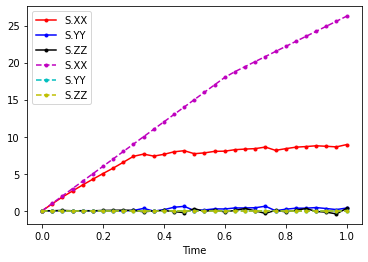

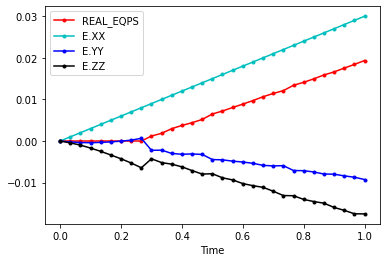

In [9]:
ISO_Y_0 = 15
ISO_H = 70
ignore_fict_eqps = True

#""" Force deviatoric independence on a BINGO solution
def A(real_eqps, fict_eqps=None ):
    if ignore_fict_eqps:
        fict_eqps = real_eqps

    # real_eqps = 0
    # fict_eqps = 0
    B_in = ((array(0.19468542))/(real_eqps + array(0.19468542)) ) * (array([[-0.78883927, -0.17774928,  0.05046644],
       [-0.94038756, -0.01281956,  0.0229076 ],
       [-0.80953323, -0.10425625, -0.02368224]]))
    B_in *= (ISO_Y_0 + ISO_H*fict_eqps)
    B_in = align_axes_with_pi_plane_rot.T @ B_in @ align_axes_with_pi_plane_rot
    B_in[:, 2] = 0
    B_in[2, :] = 0
    B_in[2, 2] = 1
    B_in = align_axes_with_pi_plane_rot @ B_in @ align_axes_with_pi_plane_rot.T
    return B_in
#"""

#""" Force deviatoric independence on a BINGO solution
def A_inv(real_eqps, fict_eqps=None):
    if ignore_fict_eqps:
        fict_eqps = real_eqps
    # real_eqps = 0
    # fict_eqps = 0
    B_in = ((real_eqps + array(0.19468542))/(array(0.19468542)) ) * array([[  0.28170912,  -0.99115652,  -0.35841883],
       [ -4.27138056,   6.23055581,  -3.07548147],
       [  9.17418386,   6.4520822 , -16.43467351]])
    B_in /= (ISO_Y_0 + ISO_H*fict_eqps)
    B_in = align_axes_with_pi_plane_rot.T @ B_in @ align_axes_with_pi_plane_rot
    B_in[:, 2] = 0
    B_in[2, :] = 0
    B_in[2, 2] = 1
    B_in = align_axes_with_pi_plane_rot @ B_in @ align_axes_with_pi_plane_rot.T
    return B_in
#"""

# Shared params
E = 10e2
nu = .333
Y0 = ISO_Y_0
H = ISO_H


# F_11 = 1.05
# all_comps = (F_11, 0, 0, 0, 1/np.sqrt(F_11), 0, 0,0, 1/np.sqrt(F_11))
# all_loads = 'FFFFFFFFF'
all_comps = (0.03, 0, 0)
all_loads = 'ESS'

all_frames = 30

# Run ST_GPSR_TTM model
pGPSR = {'E': E, 'Nu': nu, "Y0": Y0, "H": H, "A_mapping": A, "B_mapping": A_inv}
mpsGPSR = run_ST_GPSR_TTM(pGPSR, frames=all_frames, components=all_comps, loads=all_loads)
# Run the included von mises model
pHill = {'E': E, 'Nu': nu,  "F": 1.0, "G": 0.3, "H": 7.0}
mpsH = MaterialPointSimulator('Hill')
mpsH.material = Hill(**pHill)
mpsH = run_generic_mps(mpsH, pHill, frames=all_frames, components=all_comps, loads=all_loads)

ax = mpsGPSR.plot('Time', 'S.XX', style='.r-')
mpsGPSR.plot('Time', 'S.YY', ax=ax, style='.b-')
mpsGPSR.plot('Time', 'S.ZZ', ax=ax, style='.k-')

mpsH.plot('Time', 'S.XX', ax=ax, style='.m--')
mpsH.plot('Time', 'S.YY', ax=ax, style='.c--')
mpsH.plot('Time', 'S.ZZ', ax=ax, style='.y--')

ax2 = mpsGPSR.plot('Time', 'REAL_EQPS', style='.r-', )
ax2 = mpsGPSR.plot('Time', 'E.XX', style='.c-', ax=ax2)
ax2 = mpsGPSR.plot('Time', 'E.YY', style='.b-', ax=ax2)
ax2 = mpsGPSR.plot('Time', 'E.ZZ', style='.k-', ax=ax2 )
# mpsVM.plot('E.XX', 'EP_Equiv', ax=ax2, style='k--')


In [5]:
# Plot error plot
# For each results array, let' find the error between the predicted value and the analytical
def hill_YS(stress_vector, eqps, F=1., G=0.3, H=7.):
    analytical_Y = (13.6208515706149 + 69.9208533115855*eqps)
    sigma_1 = stress_vector[0]
    sigma_2 = stress_vector[1]
    sigma_3 = stress_vector[2]
    simulation_Y = np.sqrt(1./2.)*np.sqrt(F * (sigma_2 - sigma_3)**2 + G * (sigma_3 - sigma_1)**2 + H*(sigma_1 - sigma_2)**2 )

    error = np.abs((simulation_Y - analytical_Y)/analytical_Y)*100
    #print(simulation_Y, analytical_Y, eqps)
    return error, analytical_Y, simulation_Y


sv_all = mpsGPSR.df[['S.XX', 'S.YY', 'S.ZZ']].to_numpy()
h_eqps = mpsGPSR.df[['REAL_EQPS']].to_numpy()
error = []
analy = []
simul = []
for sv, eq in zip(sv_all, h_eqps):
    e, a, s = hill_YS(sv, eq)
    error.append(e)
    analy.append(a)
    simul.append(s)
error

[array([100.]),
 array([0.67801955]),
 array([0.44116193]),
 array([0.35259785]),
 array([2.00582818]),
 array([1.40056942]),
 array([1.97691334]),
 array([1.66676926]),
 array([2.67186437]),
 array([2.45272016]),
 array([2.39556091]),
 array([3.23637139]),
 array([2.80147655]),
 array([4.89669304]),
 array([3.69147118]),
 array([4.71222599]),
 array([4.66574245]),
 array([5.22288937]),
 array([5.83363311]),
 array([5.02757445]),
 array([6.95743253]),
 array([6.12209949]),
 array([6.29506821]),
 array([7.07668238]),
 array([7.01956065]),
 array([7.96143889]),
 array([8.08117129]),
 array([7.97432419]),
 array([8.3496099]),
 array([8.36094687]),
 array([9.29134214])]

In [6]:
analy

[array([13.62085157]),
 array([13.63009322]),
 array([13.69459351]),
 array([13.76587071]),
 array([13.83424536]),
 array([13.89980307]),
 array([13.97042948]),
 array([14.03379627]),
 array([14.10300972]),
 array([14.17449988]),
 array([14.24076824]),
 array([14.31043709]),
 array([14.3810148]),
 array([14.44916846]),
 array([14.51400204]),
 array([14.58437367]),
 array([14.65060833]),
 array([14.71975263]),
 array([14.78770553]),
 array([14.85327855]),
 array([14.92107633]),
 array([14.98599285]),
 array([15.05254415]),
 array([15.12414858]),
 array([15.19110594]),
 array([15.25858967]),
 array([15.32572789]),
 array([15.38768644]),
 array([15.45577782]),
 array([15.5243302]),
 array([15.59192742])]

In [7]:
simul

[0.0,
 13.722507912008124,
 13.75500883891929,
 13.814408877273923,
 14.11173654944302,
 14.09447946149313,
 14.24661276466967,
 14.267707273722264,
 14.479823010055307,
 14.522160695115234,
 14.58191451632327,
 14.773575984713256,
 14.783895561821767,
 15.156699882846477,
 15.049782242628384,
 15.271622311822249,
 15.334167980066045,
 15.488549027184883,
 15.650366019413704,
 15.6000381879731,
 15.9592001448295,
 15.903450244445551,
 16.000112070702507,
 16.194436541985024,
 16.2574548305204,
 16.473392963710364,
 16.564226208891217,
 16.614750438197003,
 16.74627497146892,
 16.82231119454745,
 17.040626746011572]

# Display subsections of the Full Shebang

In [8]:
time_zero = df_full[df_full['TIME'] == 0.75]
dtime = time_zero #[time_zero['DTIME'] == 0.05]
display(dtime[['DELTA_EXX', 'DELTA_EYY', 'DELTA_EZZ']])

NameError: name 'df_full' is not defined

# Investigate CPA inner workings

In [ ]:
# Pull out the CPA history for a certain row of interest. This block extracts the trial_Sigma history
ROW_OF_INTEREST = 12
# np.hstack([trial_Sigma_f, [yield_F], dGdSigma, dGdSigma @ C @ dGdSigma, [dGamma], delta_e_p, e_p_iso, [trial_iso_eqps] ])
r6 = range(6)
CPA_HISTORY_COLUMNS = [ [f'trial_Sigma_f_{i}' for i in r6 ], ['yield_F'], [ 'dGdSigma_{i}' for i in r6], ['v_C_v'], ['dGamma'],
                       [ 'delta_e_p_{i}' for i in r6], [ 'e_p_iso_{i}' for i in r6 ], ['trial_iso_eqps'] ]
CPA_HISTORY_COLUMNS = [x for xs in CPA_HISTORY_COLUMNS for x in xs]
cpa_history = mpsGPSR.material.cutting_plane_history[ROW_OF_INTEREST]
cpa_history = pd.DataFrame(cpa_history, columns=CPA_HISTORY_COLUMNS)

trial_stress_trajectory = np.array(cpa_history[[f'trial_Sigma_f_{i}' for i in range(3) ]])
trial_stress_trajectory

In [ ]:
# Get the data outside of the CPA algorithm
w = df_full.iloc[12]
#print(w)
# What is the start and end point of real stresses?
delta_real_stress = [ w[['TRIAL_STRESS_PRE_TRANS_XX', 'TRIAL_STRESS_PRE_TRANS_YY', 'TRIAL_STRESS_PRE_TRANS_ZZ']],
                 w[['REAL_SXX', 'REAL_SYY', 'REAL_SZZ']] ]
delta_real_stress = np.array(delta_real_stress)
delta_real_stress

In [ ]:
# Now, if I inputted that stress into an unrotated CPA algorithm, what would happen?
B_new = lambda X_0: np.eye(3)
vir_GPSR = {'E': E, 'Nu': nu, 'Y0': Y0, 'H': H, "B": B_new}
mps_vir_GPSR = run_ST_GPSR_TTM(vir_GPSR, frames=1, loads='ESS', components=w[['DELTA_EXX', 'DELTA_EYY', 'DELTA_EYY']])
#mps_vir_GPSR.plot('E.XX', 'S.XX')
vir_df = pd.DataFrame(mps_vir_GPSR.material.full_sdv_storage, columns=full_sdv_column_names)
vir_df = vir_df[column_reorder]
vir_df.to_csv('vir_shabang_0.csv')

VIR_ROI = 12
vir_cpa_history = mps_vir_GPSR.material.cutting_plane_history[VIR_ROI]
vir_cpa_history = pd.DataFrame(vir_cpa_history, columns=CPA_HISTORY_COLUMNS)

vir_stress_trajectory = np.array(vir_cpa_history[[f'trial_Sigma_f_{i}' for i in range(3) ]])
vir_stress_trajectory

In [ ]:
pi_plane_trial_stress_trajectory = (align_pi_plane_with_axes_rot() @ trial_stress_trajectory.T).T[:,:2]
pi_plane_delta_real_trajectory = (align_pi_plane_with_axes_rot() @ delta_real_stress.T).T[:,:2]
pi_plane_vir_stress_trajectory = (align_pi_plane_with_axes_rot() @ vir_stress_trajectory.T).T[:,:2]


fig = plt.figure()
ax = fig.add_subplot()
#print(pi_plane_vir_stress_trajectory)
ax.plot(*pi_plane_vir_stress_trajectory.T, marker='*', c='m', label="direct trajectory (CPA Identity B)")
ax.plot(*pi_plane_delta_real_trajectory.T, marker='o', c='k', label="mapped trajectory")
ax.plot(*pi_plane_trial_stress_trajectory.T, marker='.',  c='r', label="fictitious trajectory")
ax.legend()
draw_principal_axes(ax, length_of_axes=5000, scale=15)

ax.axis("equal")
ax.set_xlim([-8000, 8000])
ax.set_ylim([-8000, 8000])

plt.show()

fig = plt.figure()
ax = fig.add_subplot()
#print(pi_plane_vir_stress_trajectory)
ax.plot(*pi_plane_vir_stress_trajectory.T, marker='*', c='m', label="direct trajectory (CPA Identity B)")
ax.plot(*pi_plane_delta_real_trajectory.T, marker='o', c='k', label="mapped trajectory")
ax.plot(*pi_plane_trial_stress_trajectory.T, marker='.',  c='r', label="fictitious trajectory")
ax.legend()
draw_principal_axes(ax, length_of_axes=5000, scale=15)

ax.axis("equal")
ax.set_xlim([-50, 0])
ax.set_ylim([-25, 25])

plt.show()


fig = plt.figure()
ax = fig.add_subplot()
#print(pi_plane_vir_stress_trajectory)
ax.plot(*pi_plane_vir_stress_trajectory.T, marker='*', c='m', label="direct trajectory (CPA Identity B)")
ax.plot(*pi_plane_delta_real_trajectory.T, marker='o', c='k', label="mapped trajectory")
ax.plot(*pi_plane_trial_stress_trajectory.T, marker='.',  c='r', label="fictitious trajectory")
ax.legend()
draw_principal_axes(ax, length_of_axes=5000, scale=15)

ax.axis("equal")
ax.set_xlim([-550, 550])
ax.set_ylim([-550, 550])

plt.show()

In [ ]:
# You're telling me rotating the stress puts it out in the middle of no where?
# Next two cells: just verify that, and the VM value
B_inv = np.linalg.inv(B(0))
B_inv

real_stress = B_inv @ trial_stress_trajectory[1,:]
real_stress

In [ ]:
def equivalent_stress( mandel_stress_vec):
    ROOT2 = np.sqrt(2)
    # MML stress comes in the following order: 11, 22, 33, 12, 23, 13
    sigma_11, sigma_22, sigma_33, sigma_12, sigma_23, sigma_13 = mandel_stress_vec
    sigma_12 = sigma_12/ROOT2
    sigma_23 = sigma_23/ROOT2
    sigma_13 = sigma_13/ROOT2
    internal = (sigma_11 - sigma_22)**2 + (sigma_22 - sigma_33)**2 + (sigma_33 - sigma_11)**2 + 3*(sigma_23**2 + sigma_13**2 + sigma_12**2)
    vm = np.sqrt(0.5*internal)
    return vm
equivalent_stress(np.hstack([real_stress, 0,0,0]))

In [ ]:
# Okay ,apparently it's broken. Let's convert the real answer to fictious stress space / COnclision: nope, it doesnt match up
right_stress = vir_stress_trajectory[1,:]
B(0) @ right_stress, equivalent_stress(np.hstack([B(0) @ right_stress, 0,0,0]))

In [ ]:
# BINGO found this equation for hydrostat = 0
# how about we remove the hydrostat, and do the calculation
right_stress = vir_stress_trajectory[1,:]
dev_right_stress = right_stress - 1/3.*np.sum(right_stress)
# Conclusio: it's the right iso yield surface!
B(0) @ dev_right_stress, equivalent_stress(np.hstack([B(0) @ dev_right_stress, 0,0,0]))


In [ ]:
# Okay, let's try that with real_Stress
trial_stress_dev = trial_stress_trajectory[1,:] - 1./3.*np.sum(trial_stress_trajectory[1,:])
dev_real_stress = B_inv @ trial_stress_dev
dev_real_stress

In [ ]:
equivalent_stress(np.hstack([dev_real_stress, 0,0,0]))

In [ ]:
dev_plus_iso_real_stress = dev_real_stress + 1./3.*np.sum(trial_stress_trajectory[1,:])
dev_plus_iso_real_stress